# Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis

**Name:** Banoj Kumar Jena  
**Course:** MSCS 634  
**Lab Assignment:** Week 2 – Lab 1


In [1]:

# Step 1: Data Collection
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv("index_1.csv")

# Display the first five rows of the dataset for preview
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


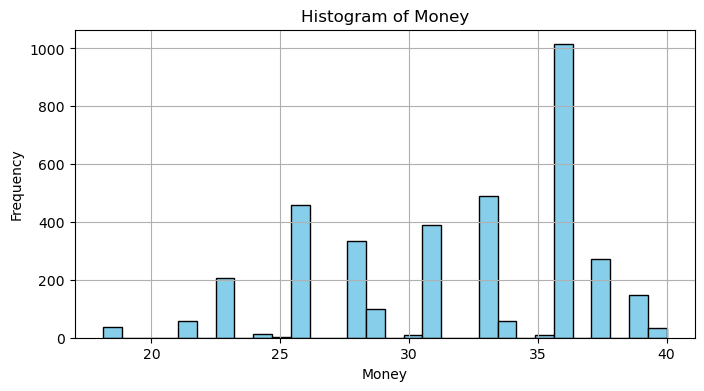

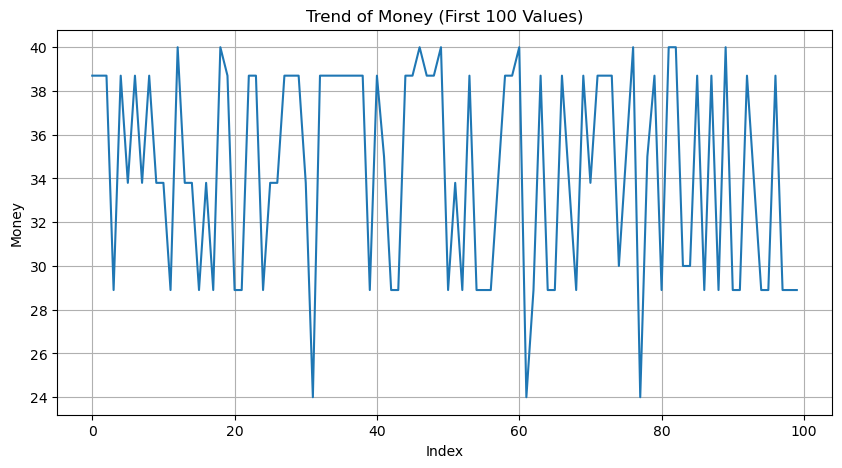

In [2]:
# Step 2: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram to visualize distribution of the 'money' column
plt.figure(figsize=(8, 4))
df['money'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Money')
plt.xlabel('Money')
plt.grid(True)
plt.show()

# Line plot to visualize trend in first 100 entries of 'money'
plt.figure(figsize=(10, 5))
df['money'].head(100).plot()
plt.title('Trend of Money (First 100 Values)')
plt.xlabel('Index')
plt.ylabel('Money')
plt.grid(True)
plt.show()


In [3]:
# Step 3: Data Preprocessing

# 1. Handling Missing Values
# Check for missing values in the dataset
df.isnull().sum()

# Fill missing values in numeric columns with their respective mean values
df_filled = df.fillna(df.mean(numeric_only=True))

# Display the number of missing values before and after filling
df.isnull().sum(), df_filled.isnull().sum()


(date            0
 datetime        0
 cash_type       0
 card           89
 money           0
 coffee_name     0
 dtype: int64,
 date            0
 datetime        0
 cash_type       0
 card           89
 money           0
 coffee_name     0
 dtype: int64)

In [4]:
# 2. Outlier Detection and Removal using IQR
Q1 = df_filled['money'].quantile(0.25)
Q3 = df_filled['money'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers beyond 1.5*IQR from Q1 or Q3
outliers = df_filled[(df_filled['money'] < Q1 - 1.5 * IQR) | (df_filled['money'] > Q3 + 1.5 * IQR)]

# Remove outliers by excluding their indices
df_no_outliers = df_filled[~df_filled.index.isin(outliers.index)]


In [5]:
# 3. Data Reduction
# Sample 50% of the data randomly
df_sample = df_no_outliers.sample(frac=0.5, random_state=1)

# Drop less relevant columns like 'Ticker' and 'Company Name' if they exist
df_reduced = df_sample.drop(['Ticker', 'Company Name'], axis=1, errors='ignore')


In [6]:
# 4. Data Scaling using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_reduced.copy()

# Apply Min-Max scaling to the 'money' column
df_scaled[['money']] = scaler.fit_transform(df_scaled[['money']])


In [7]:
# Step 4: Statistical Analysis

# 1. General Overview of the Data
# Display info and statistical summary
df_scaled.info()
df_scaled.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1818 entries, 1772 to 1414
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1818 non-null   object 
 1   datetime     1818 non-null   object 
 2   cash_type    1818 non-null   object 
 3   card         1773 non-null   object 
 4   money        1818 non-null   float64
 5   coffee_name  1818 non-null   object 
dtypes: float64(1), object(5)
memory usage: 99.4+ KB


,money
count,1818.000000
mean,0.619614
std,0.225335
min,0.000000
25%,0.447898
50%,0.671846
75%,0.806216
max,1.000000


In [8]:
# 2. Central Tendency Measures
print("Min:", df_scaled['money'].min())
print("Max:", df_scaled['money'].max())
print("Mean:", df_scaled['money'].mean())
print("Median:", df_scaled['money'].median())
print("Mode:", df_scaled['money'].mode()[0])


Min: 0.0
Max: 1.0
Mean: 0.619613835240928
Median: 0.6718464351005484
Mode: 0.8062157221206581


In [9]:
# 3. Dispersion Measures
print("Range:", df_scaled['money'].max() - df_scaled['money'].min())
print("Variance:", df_scaled['money'].var())
print("Standard Deviation:", df_scaled['money'].std())
Q1 = df_scaled['money'].quantile(0.25)
Q3 = df_scaled['money'].quantile(0.75)
print("IQR:", Q3 - Q1)


Range: 1.0
Variance: 0.05077590909642548
Standard Deviation: 0.22533510400384907
IQR: 0.3583180987202923


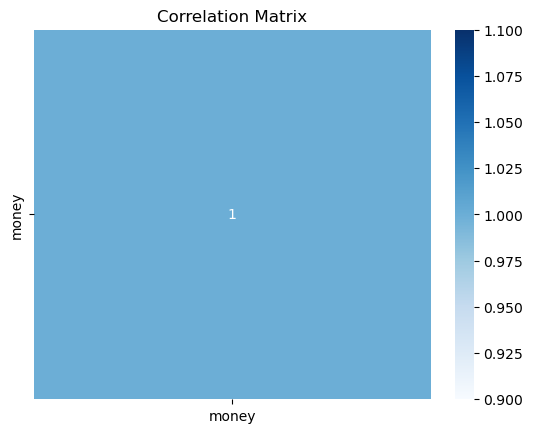

In [10]:
# 4. Correlation Analysis

# Convert relevant date fields to datetime for any future time-based analysis
df_no_outliers['date'] = pd.to_datetime(df_no_outliers['date'])
df_no_outliers['datetime'] = pd.to_datetime(df_no_outliers['datetime'])

# Select numeric columns for correlation matrix
numeric_df = df_no_outliers.select_dtypes(include=['number'])

# Compute and plot the correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()
